### <center> K-MEANS CLUSTERING

A small demo of one of the most simple yet popular clustering algorithm, i.e. the K-Means clustering algorithm. 
But first what is clustering? 

__Clustering__ is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.
So, K-means is a clustering algorithm  which tries to minimize the distance of the points in a cluster with their centroid. It involves the following simple steps:

* __Step 1__: Choose the number of clusters k
* __Step 2__: Select k random points from the data as centroids
* __Step 3__: Assign all the points to the closest cluster centroid
* __Step 4__: Recompute the centroids of newly formed clusters
* __Step 5__: Repeat steps 3 and 4 until stopping criteria is met

In [76]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import LabelEncoder
from drawdata import draw_scatter

First, we define our function which would simply perform a k-means clustering on the given data and plot the actual and predicted values.

In [ ]:
def k_means(df, index1, index2, K):
    
    # Train array
    X = np.array(df.iloc[:,0:-1])
    
    # Actual labels
    y = np.array(df.iloc[:,-1])
    
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    
    # Encoding actual labels 
    y = labelencoder.fit_transform(y)
    
    # selecting columns to display
    label_x = df.columns[index1]
    label_y = df.columns[index2]
    
    km = KMeans(n_clusters = K, random_state=21)
    
    km.fit(X)
    
    #this will tell us to which cluster does the data observations belong.
    new_labels = km.labels_
    
    # Plot the identified clusters and compare with the answers
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[:, index1], X[:, index2], c=y, cmap='gist_rainbow',
    edgecolor='k', s=150)
    axes[1].scatter(X[:, index1], X[:, index2], c= new_labels, cmap='jet',
    edgecolor='k', s=150)
    axes[0].set_xlabel(label_x, fontsize=18)
    axes[0].set_ylabel(label_y, fontsize=18)
    axes[1].set_xlabel(label_x, fontsize=18)
    axes[1].set_ylabel(label_y, fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('Predicted', fontsize=18)

There are 2 ways to proceed, we will explore both! First, we will create a data set by our own using a library called `drawdata`. Then, in the second way, we will use the famous `iris` dataset from the UCI machine learning repo. 

In [77]:
# Remember to use the `copy.csv` option after drawing if you want to use the data in pandas
draw_scatter()

In [81]:
# Reading the dataset created above
data = pd.read_clipboard(sep=",")

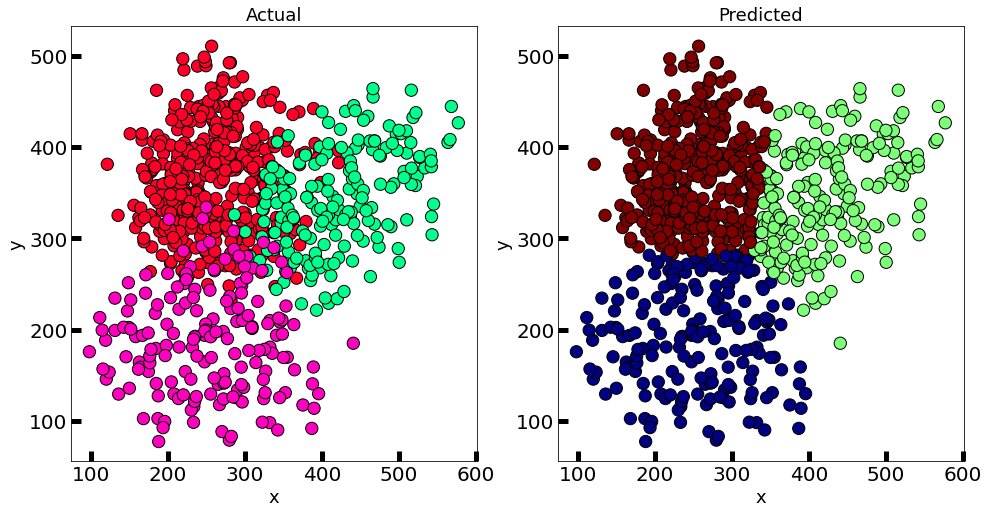

In [82]:
# Running k-means on the drawn data
k_means(data, 0, 1, K=3)

In [84]:
# Downloading iris data from uci repository
iris.names = ["sepal length","sepal width","petal length","petal width","Type of flower"]
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=iris.names)
iris.head()

,sepal length,sepal width,petal length,petal width,Type of flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


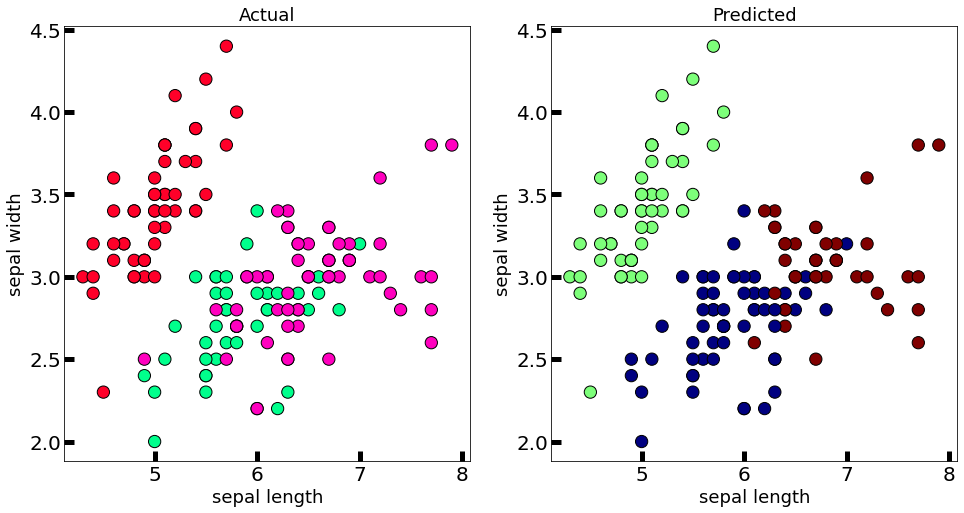

In [85]:
# Running k-means on iris data
k_means(iris, 0, 1, 3)

For finding the best value of K, we use the elbow method, as shown below. 

We would use __SSE__ which is the sum of the squared distance between each datapoint and its allocated cluster centroid. If all datapoints are tightly congregated around their allocated centroid, then the SSE will be low — otherwise, it will be high.

Using the elbow method, we select the value of K by identifying the `elbow` of the graph.

In [89]:
# iris data without labels
X = np.array(iris.iloc[:,0:-1])

In [90]:
# sum of squared distance
sse = []

for K in range(1, 10):
    model = KMeans(n_clusters=K)
    model.fit(X)
    sse.append(model.inertia_)
    

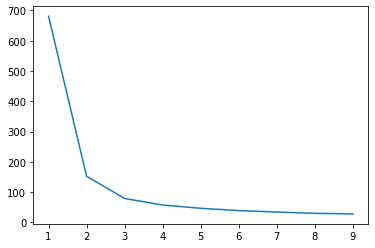

In [92]:
plt.plot(range(1,10), sse)

From the above plot, we see the elbow points are 2 and 3, both of which can give us good results, however K = 3 would be the optimal choice. 